In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

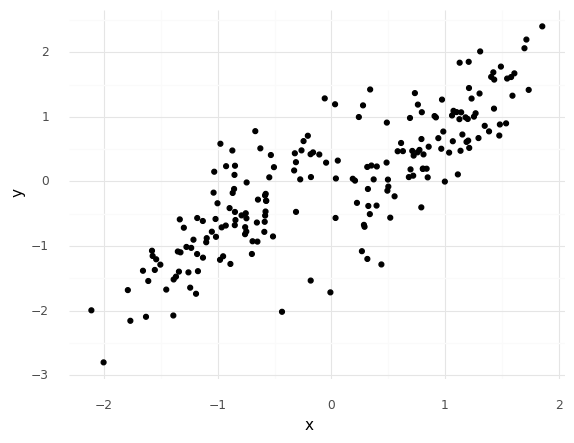

<ggplot: (8737203251414)>

In [74]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

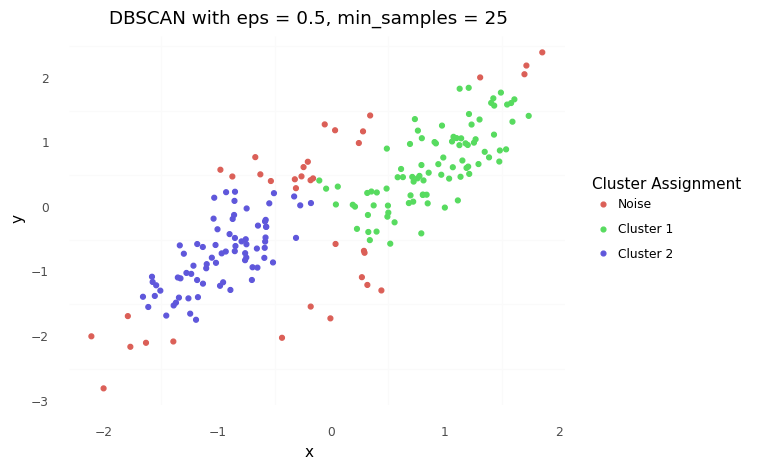

<ggplot: (8737203518952)>

In [75]:
# dbscan and plot
#min_sample < 25 ---> score decreases
#eps < 0.5 -----> increase cluster score and decrease overall score
#eps too high number ----> all data will be one cluster,raise error
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [76]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

In [77]:
# overall 
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

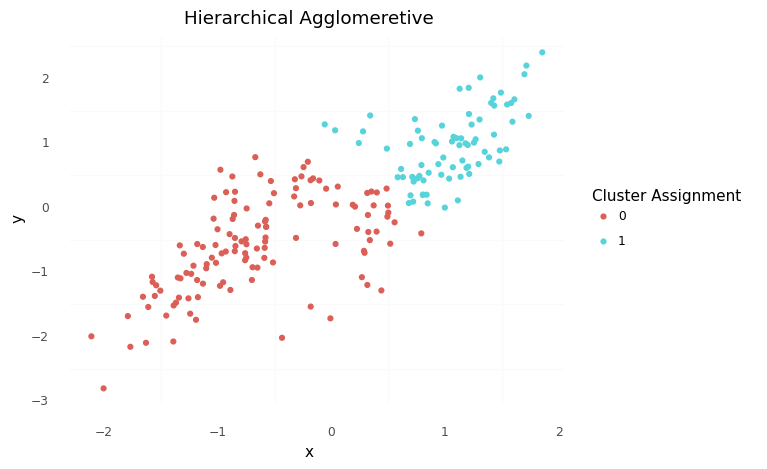


0.5072921620254586


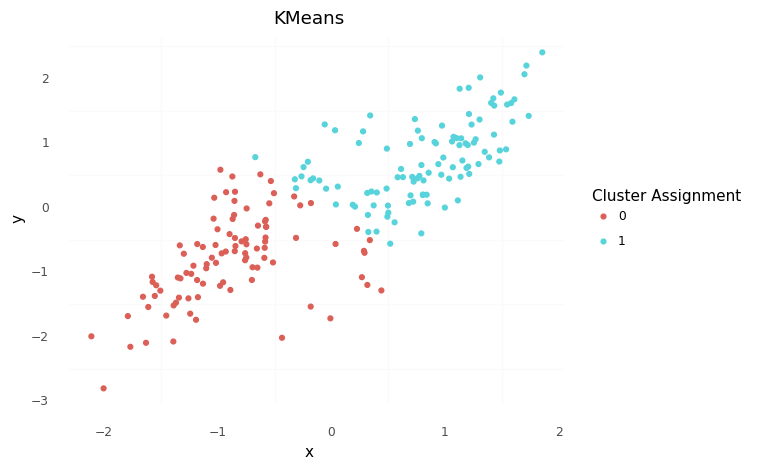


0.5319247935472973


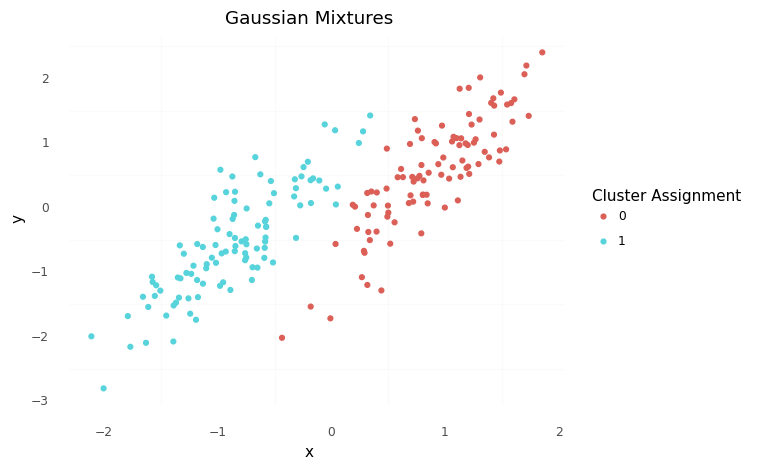


0.45114087997192337


In [70]:
# k =2 --> optimal
# k =3 --> scores will be from 30-->40
# k =4 or more --> kmeans score increases, but not to its optimal case k=2
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d1[["x","y"]])
km.fit(d1[["x","y"]])
gm.fit(d1[["x","y"]])

d1["hac"] = hac.labels_
d1["km"] = km.labels_
d1["gm"] = gm.predict(d1[["x","y"]])


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d1[["x","y"]], d1["hac"]))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d1[["x","y"]], d1["km"]))


print(ggplot(d1, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d1[["x","y"]], d1["gm"]))

## Dataset 2

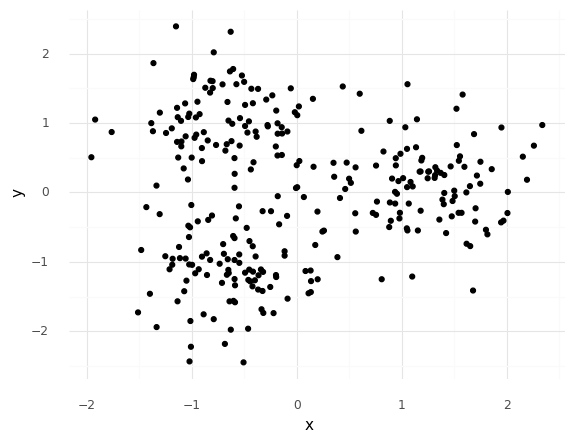

<ggplot: (8737203029396)>

In [78]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

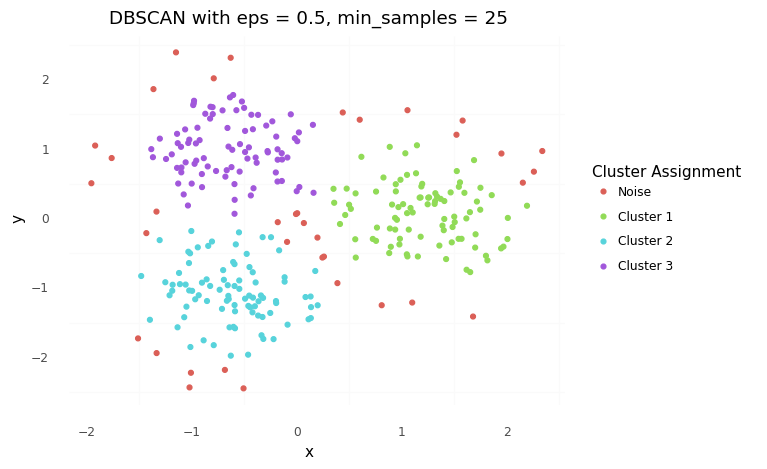

<ggplot: (8737210102411)>

In [79]:
#eps < 0.5 -----> increase cluster score and decrease overall score
#optimal 0.5, 25
# min_sample = 30 ---> cluster score increases and overall score decreases
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [80]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall 
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


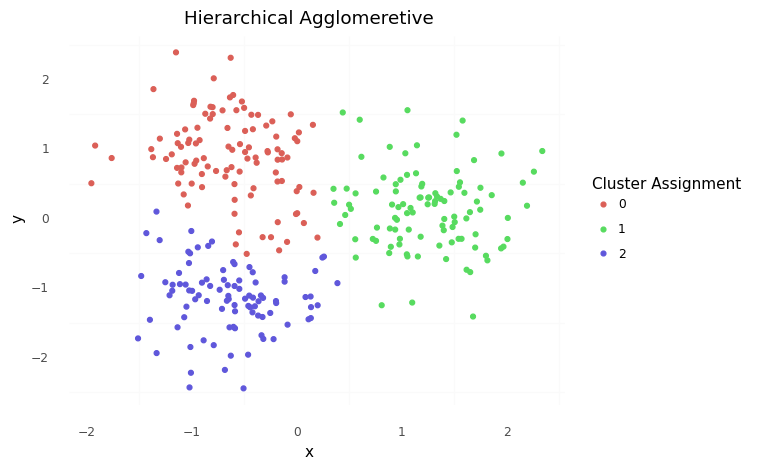


0.5331004784160975


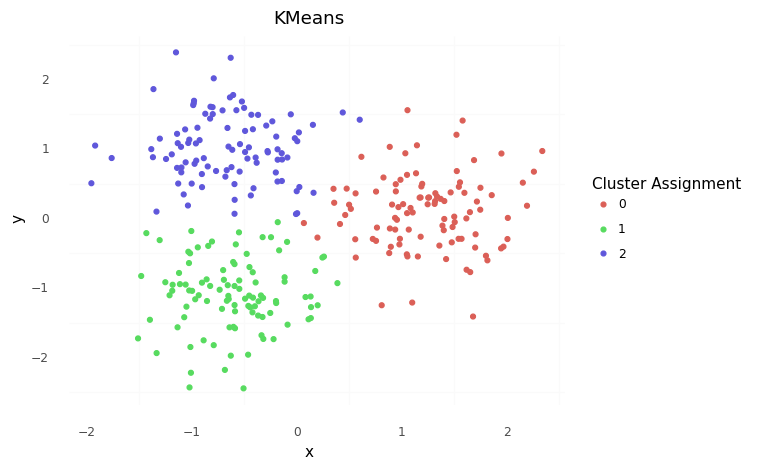


0.558315766313531


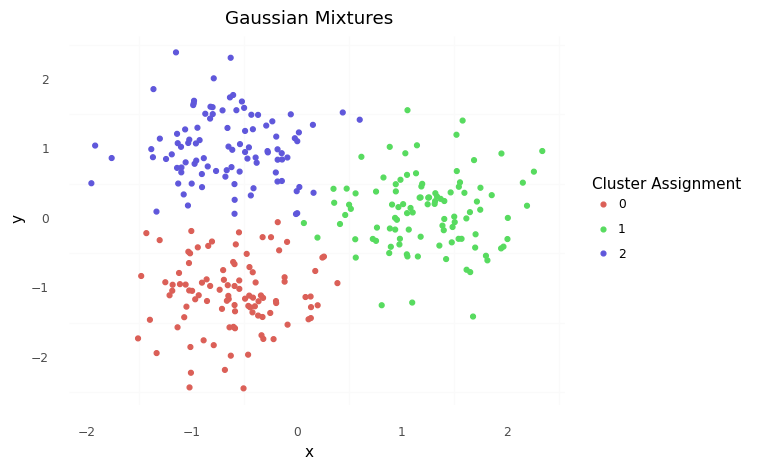


0.558315766313531


In [81]:
# k decreases --> score decreases of the 3 models
# optimal = 3
# k increases --> score increases but doesn't reach its optimal value
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)

hac.fit(d2[["x","y"]])
km.fit(d2[["x","y"]])
gm.fit(d2[["x","y"]])

d2["hac"] = hac.labels_
d2["km"] = km.labels_
d2["gm"] = gm.predict(d2[["x","y"]])


print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d2[["x","y"]], d2["hac"]))

print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d2[["x","y"]], d2["km"]))

print(ggplot(d2, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d2[["x","y"]], d2["gm"]))

## Dataset 3

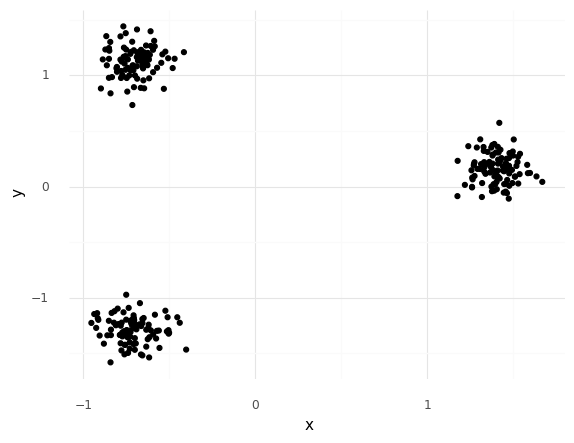

<ggplot: (8737202989430)>

In [82]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

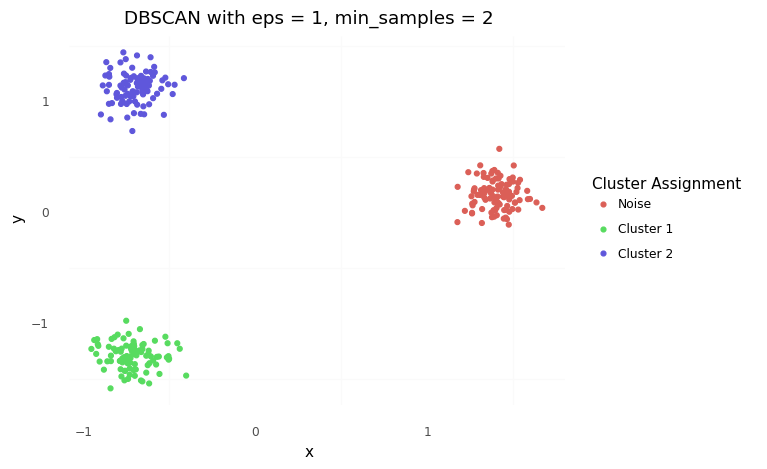

<ggplot: (8737203661243)>

In [41]:
#changing eps , min_samples will not affect the results 
#data can be clustered clearly (no overlapping between data points)
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [42]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall 
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


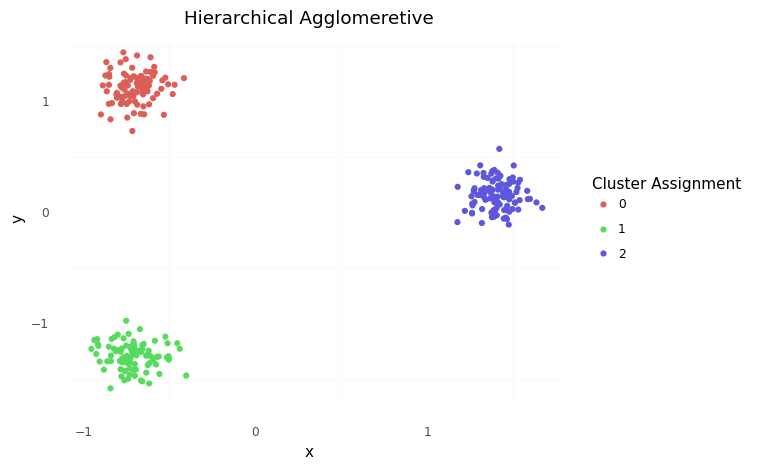


0.913619050733588


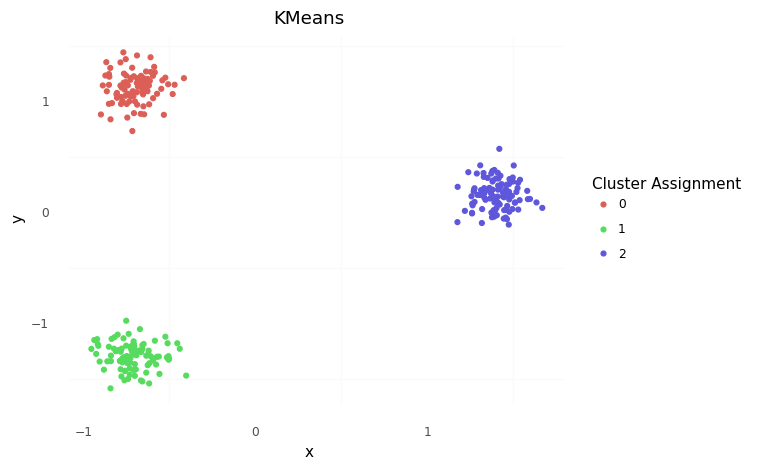


0.913619050733588


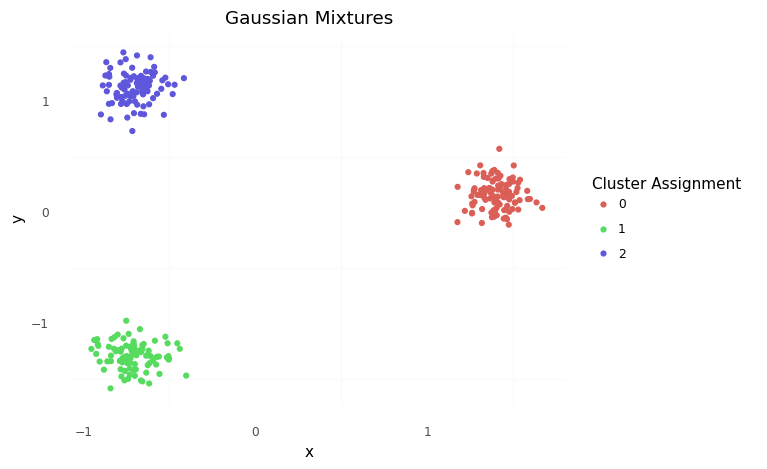


0.913619050733588


In [83]:
# k decreases --> score decreases of the 3 models
# optimal = 3
# k increases --> score increases but doesn't reach its optimal value
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)

hac.fit(d3[["x","y"]])
km.fit(d3[["x","y"]])
gm.fit(d3[["x","y"]])

d3["hac"] = hac.labels_
d3["km"] = km.labels_
d3["gm"] = gm.predict(d3[["x","y"]])


print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d3[["x","y"]], d3["hac"]))

print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d3[["x","y"]], d3["km"]))

print(ggplot(d3, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d3[["x","y"]], d3["gm"]))

## Dataset 4

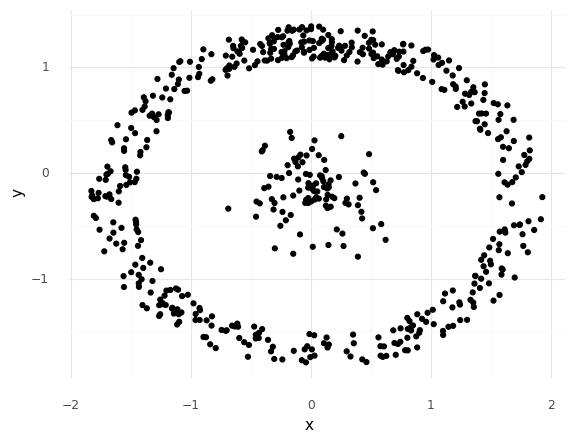

<ggplot: (8737203402506)>

In [86]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

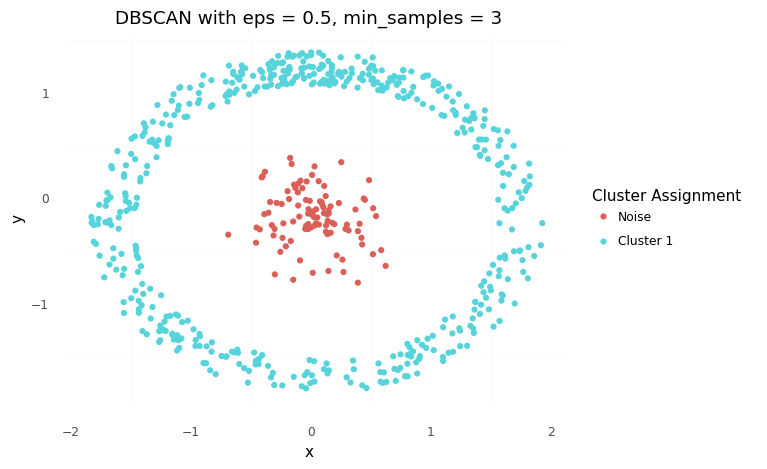

<ggplot: (8737203396545)>

In [87]:
#data is distrbuted in a way that helps DBSCAN to correctly scan the points
db4 = DBSCAN(eps = 0.5, min_samples = 25).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [88]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall 
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


### Compare

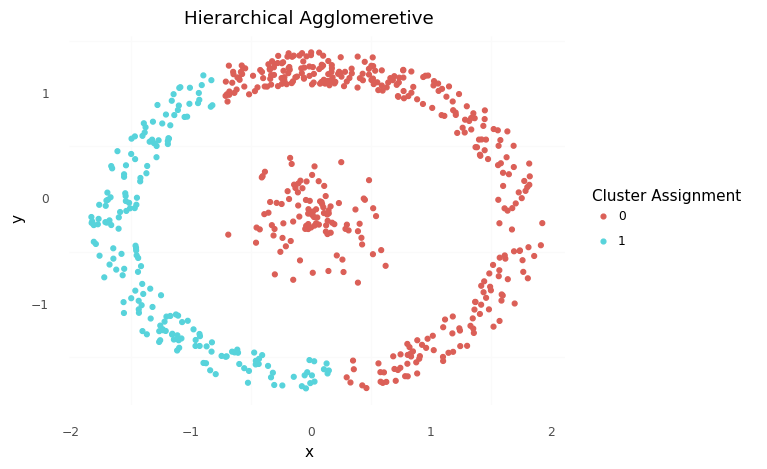


0.360199832511491


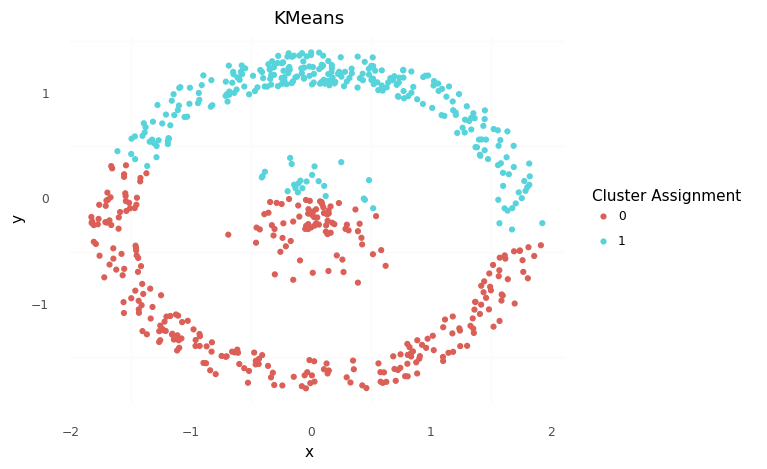


0.37428500782082524


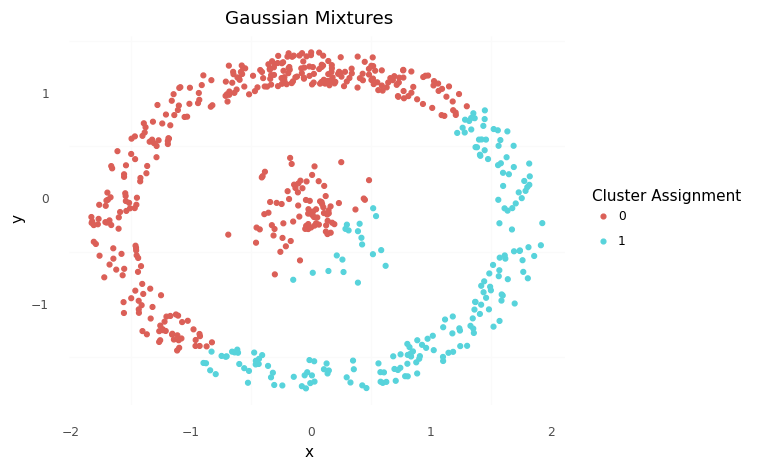


0.3583190375067355


In [90]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d4[["x","y"]], d4["hac"]))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d4[["x","y"]], d4["km"]))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d4[["x","y"]], d4["gm"]))

## Dataset 5

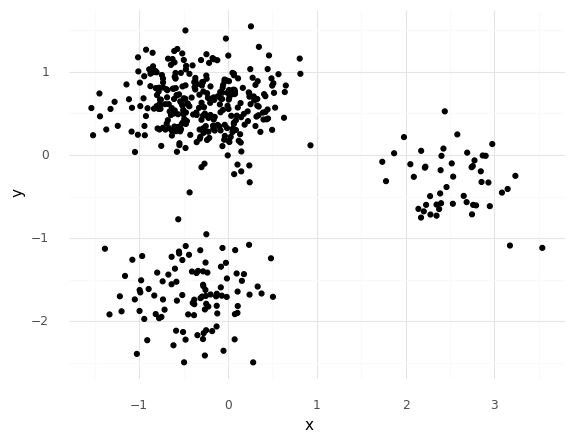

<ggplot: (8737203096031)>

In [91]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

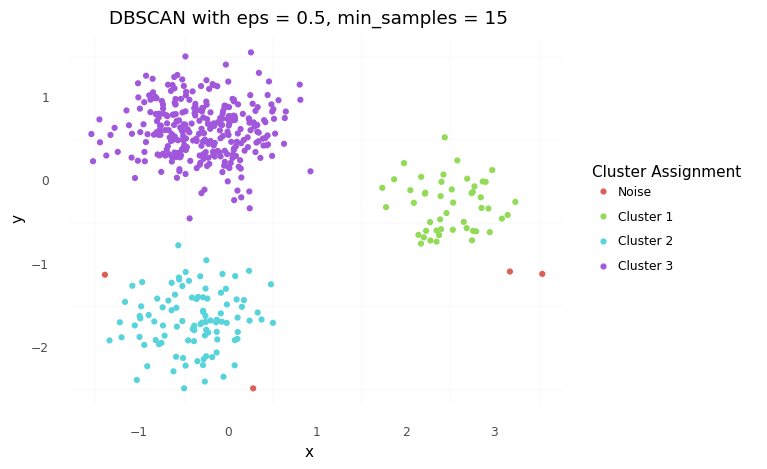

<ggplot: (8737207281887)>

In [92]:
#eps change --> cluster score increases and overall score decreases
#minimum_sample optimal @ 20 (eps = 0.5)
db5 = DBSCAN(eps = 0.5, min_samples = 20).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [93]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall 
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7061124706552685
0.6872152196711823


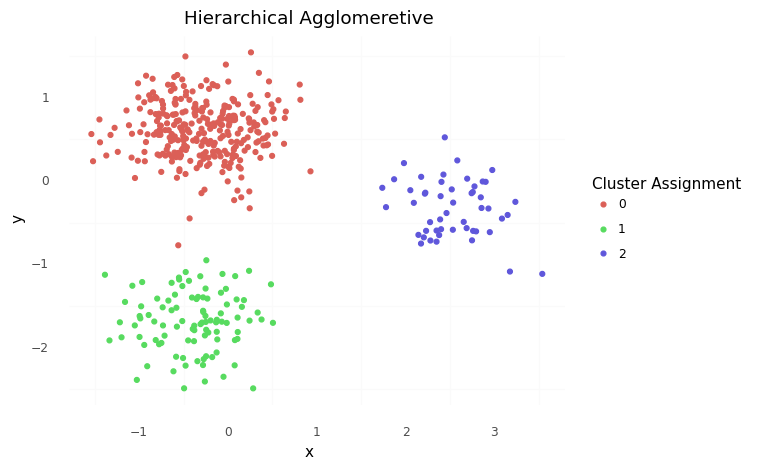


0.7031189213721805


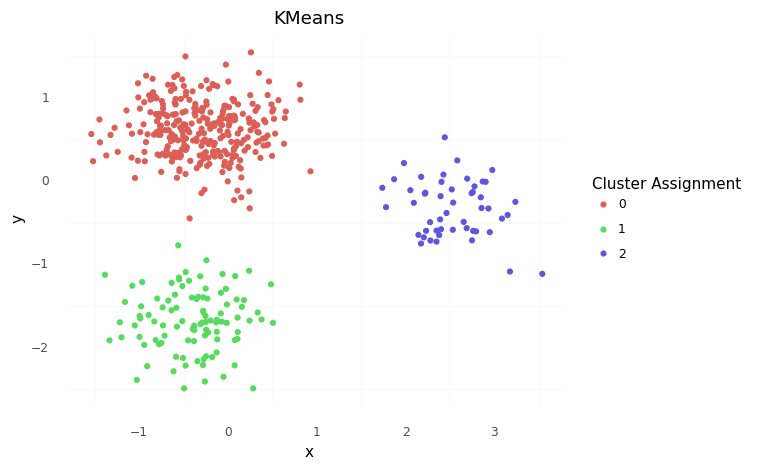


0.7043537508086658


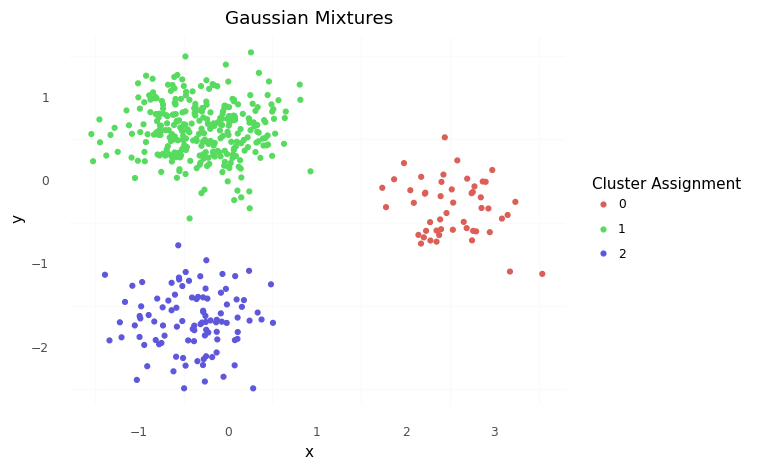


0.7043537508086658


In [94]:
#optimal @ k = 3
#increasing or decreasing k will decrease the overall score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)

hac.fit(d5[["x","y"]])
km.fit(d5[["x","y"]])
gm.fit(d5[["x","y"]])

d5["hac"] = hac.labels_
d5["km"] = km.labels_
d5["gm"] = gm.predict(d5[["x","y"]])


print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d5[["x","y"]], d5["hac"]))

print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d5[["x","y"]], d5["km"]))

print(ggplot(d5, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d5[["x","y"]], d5["gm"]))

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

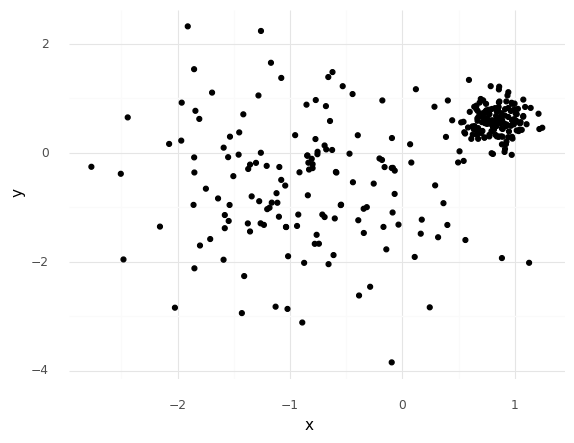

<ggplot: (8737203160802)>

In [97]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [64]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(d6[["x", "y"]])

distances, neighbors = nn.kneighbors(d6[["x", "y"]])

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.45863691, 0.62402991, 0.6937056 ],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]])

In [65]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

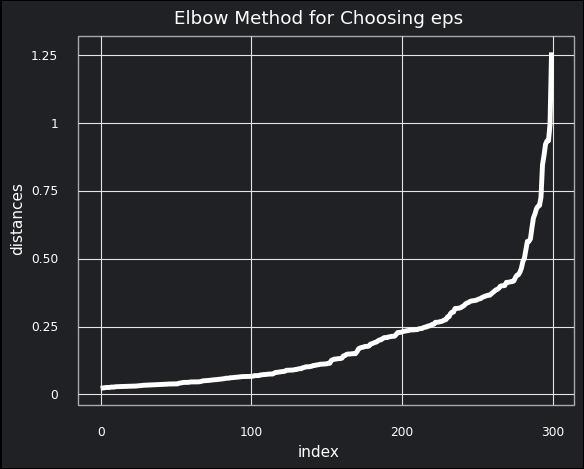

<ggplot: (8737203757885)>

In [66]:
#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

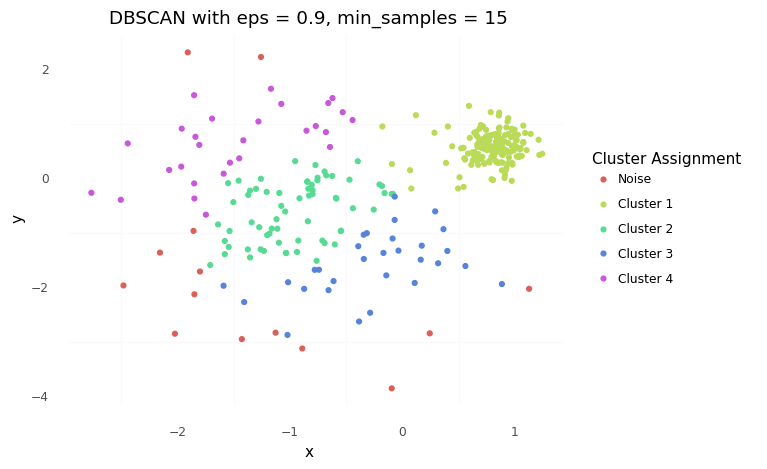

<ggplot: (8737201327111)>

In [107]:
#(minimum sample = 15) and changing eps 0.5 --> score decreases 
#minimu sample < 15 ---> one cluster
# when eps decreases so much, gap between cluster and overall scores increases
#optimal @ eps = 1
db6 = DBSCAN(eps = 1, min_samples = 15).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [108]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall 
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.5759907293850293
0.5361550095550047


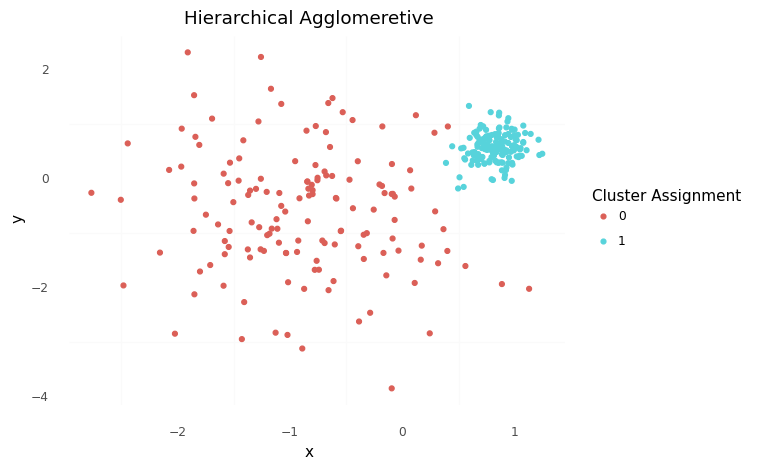


0.5538801329572542


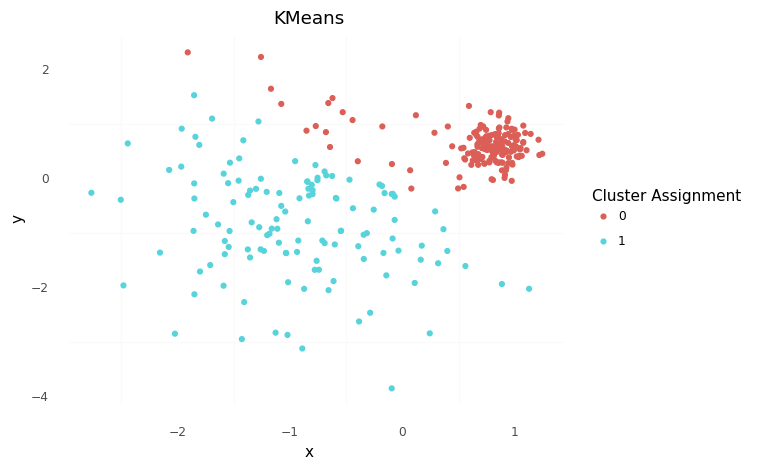


0.5829742988895884


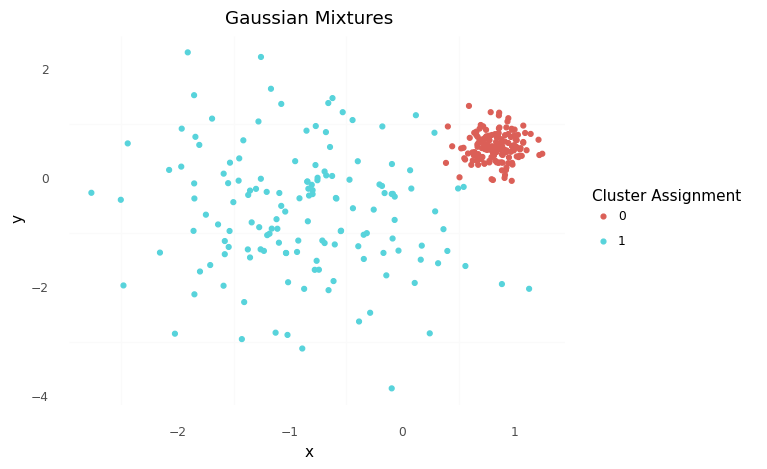


0.5531426830972709


In [110]:
#k = 2 optimal
#k = 3,4 score decreases
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d6[["x","y"]])
km.fit(d6[["x","y"]])
gm.fit(d6[["x","y"]])

d6["hac"] = hac.labels_
d6["km"] = km.labels_
d6["gm"] = gm.predict(d6[["x","y"]])


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))
print(silhouette_score(d6[["x","y"]], d6["hac"]))

print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))
print(silhouette_score(d6[["x","y"]], d6["km"]))

print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(silhouette_score(d6[["x","y"]], d6["gm"]))